In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def imshow(title='Image',image=None,size=10):
  w=image.shape[0]
  h=image.shape[1]
  aspect_ratio=w/h
  plt.figure(figsize=(aspect_ratio*size,size))
  plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show()

In [2]:
# Download and unzip our images
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

--2023-07-21 20:27:34--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.149.182
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.149.182|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  21.5MB/s    in 1.3s    

2023-07-21 20:27:36 (21.5 MB/s) - ‘images.zip’ saved [29586716/29586716]



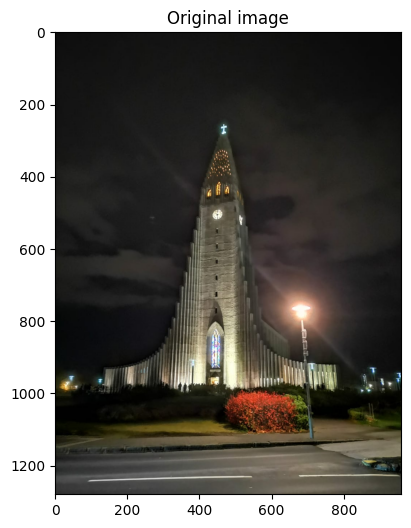

In [3]:
image=cv2.imread('/content/images/church_iceland.jpeg')
imshow('Original image',image,size=6)

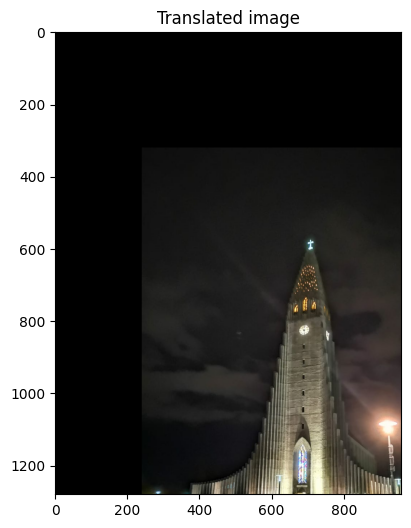

In [4]:
from cv2.gapi import warpAffine
height,width=image.shape[:2]
quarter_height=height/4
quarter_width=width/4
##applying translation
## T=|1 0 Tx|
##   |0 1 Ty|
# T is our translation matrix
T=np.float32([[1,0,quarter_width],[0,1,quarter_height]])
image_translation=cv2.warpAffine(image,T,(width,height))
imshow('Translated image',image_translation,size=6)

In [5]:
print(T)
print(height,width)

[[  1.   0. 240.]
 [  0.   1. 320.]]
1280 960


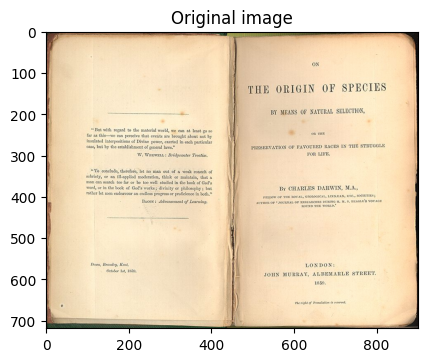

In [6]:
##Rotations
image=cv2.imread('/content/images/Origin_of_Species.jpg')
imshow('Original image',image,size=6)

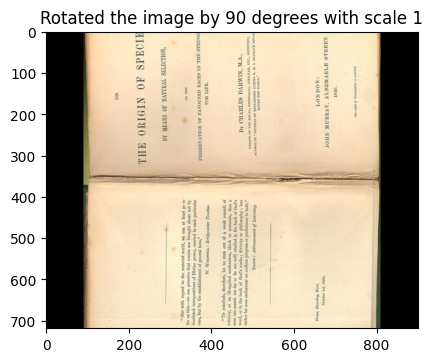

In [7]:
height,width=image.shape[:2]
#dividing by 2 to rotate the matrix around its center
rotation_matrix=cv2.getRotationMatrix2D((width/2,height/2),90,1) #1 in the rotation matrix represents the scale
rotated_image=cv2.warpAffine(image,rotation_matrix,(width,height))
imshow('Rotated the image by 90 degrees with scale 1',rotated_image,size=6)

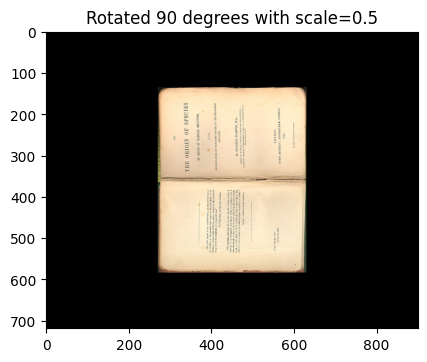

In [8]:
rotation_matrix=cv2.getRotationMatrix2D((width/2,height/2),90,0.5)
rotated_image=cv2.warpAffine(image,rotation_matrix,(width,height))
imshow('Rotated 90 degrees with scale=0.5',rotated_image,size=6)

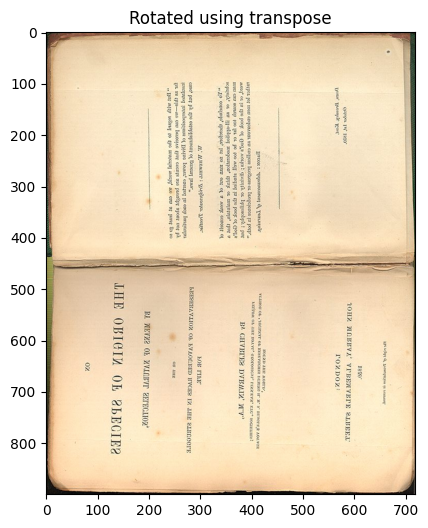

In [9]:
rotated_image=cv2.transpose(image)
imshow('Rotated using transpose',rotated_image,size=6)

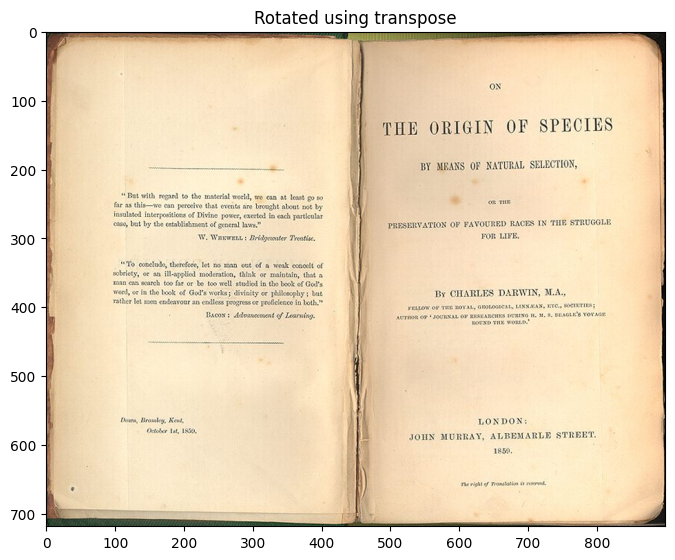

In [10]:
rotated_image=cv2.transpose(image)
rotated_image=cv2.transpose(rotated_image)
imshow('Rotated using transpose',rotated_image)

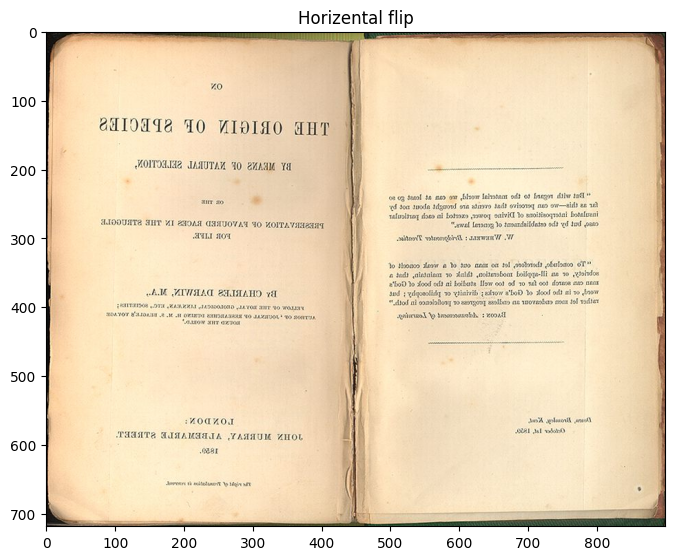

In [11]:
#flipping the image
flipped=cv2.flip(image,1)
imshow('Horizental flip',flipped)